<a href="https://colab.research.google.com/github/supuni9622/Test-Google-Colab/blob/main/Final_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
cd /content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/Full

/content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/Full


# Import libraries and packages

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import random
from scipy.stats import uniform, randint

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet, stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Import Datasets, Data Preporation and Visualization

**Import Datasets**

In [5]:
# df = pd.read_csv('Songs_Data.csv',encoding='cp1252', index_col ="Song_ID")
df = pd.read_csv('Songs_Data.csv',encoding='cp1252')
df = df.dropna(how="any").reset_index(drop=True)

In [6]:
df.drop('Key',
  axis='columns', inplace=True)

**Explore Data**

In [7]:
df.head(3)

,Song_ID,Song Title,Genre,Acorsticness,Tempo (bpm),Loudness (db),Energy,Danceability,Valence,Instrumentalness,Mode,Time Signature,Key-Name,Music-Emotion,Chorus,Lyrical-Emotion
0,1,Diana,Pop,0.06,172,-4,0.87,0.55,0.76,0.0,1,4,D major,Inspiration,"Diana,\rLet me be the one to light a fire insi...",Inspiration
1,2,Don't forget where you belong,Pop,0.10,92,-6,0.71,0.54,0.29,0.0,1,4,G major,Sad,Don't forget where you belong\rHome\rDon't for...,Inspiration
2,3,Strong,Pop,0.06,115,-7,0.66,0.74,0.34,0.0,1,4,C major,Inspiration,"I'm sorry if I say, ""I need you""\nBut I don't ...",Inspiration


In [8]:
print(df.shape)
print("Number of rows: "+str(df.shape[0]))
print("Number of columns: "+str(df.shape[1]))

(800, 16)
Number of rows: 800
Number of columns: 16


In [9]:
df.columns

Index(['Song_ID', 'Song Title', 'Genre', 'Acorsticness', 'Tempo (bpm)',
       'Loudness (db)', 'Energy', 'Danceability', 'Valence',
       'Instrumentalness', 'Mode', 'Time Signature', 'Key-Name',
       'Music-Emotion', 'Chorus', 'Lyrical-Emotion'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Song_ID,800.0,400.500000,231.084400,1.00,200.75,400.50,600.25,800.00
Acorsticness,800.0,0.297712,0.313664,0.00,0.03,0.16,0.54,1.00
Tempo (bpm),800.0,120.602500,29.216502,59.00,99.00,120.00,140.00,206.00
Loudness (db),800.0,-7.856250,4.044878,-44.00,-10.00,-7.00,-5.00,-1.00
Energy,800.0,0.596875,0.234357,0.00,0.43,0.63,0.79,1.00
Danceability,800.0,0.561700,0.166959,0.09,0.44,0.57,0.68,0.96
Valence,800.0,0.415038,0.241086,0.03,0.22,0.38,0.59,0.99
Instrumentalness,800.0,0.072250,0.213656,0.00,0.00,0.00,0.00,0.97
Mode,800.0,0.640000,0.480300,0.00,0.00,1.00,1.00,1.00
Time Signature,800.0,3.893750,0.415544,1.00,4.00,4.00,4.00,5.00


Check null values

In [11]:
df.isnull().sum()

Song_ID             0
Song Title          0
Genre               0
Acorsticness        0
Tempo (bpm)         0
Loudness (db)       0
Energy              0
Danceability        0
Valence             0
Instrumentalness    0
Mode                0
Time Signature      0
Key-Name            0
Music-Emotion       0
Chorus              0
Lyrical-Emotion     0
dtype: int64

**Data Visualization - Musical Data**

In [12]:
music_df = df[['Genre', 'Acorsticness', 'Tempo (bpm)', 'Loudness (db)', 'Energy', 'Danceability', 'Valence', 'Instrumentalness', 'Mode', 'Time Signature', 'Key-Name', 'Music-Emotion']]
music_df.head(3)

,Genre,Acorsticness,Tempo (bpm),Loudness (db),Energy,Danceability,Valence,Instrumentalness,Mode,Time Signature,Key-Name,Music-Emotion
0,Pop,0.06,172,-4,0.87,0.55,0.76,0.0,1,4,D major,Inspiration
1,Pop,0.10,92,-6,0.71,0.54,0.29,0.0,1,4,G major,Sad
2,Pop,0.06,115,-7,0.66,0.74,0.34,0.0,1,4,C major,Inspiration


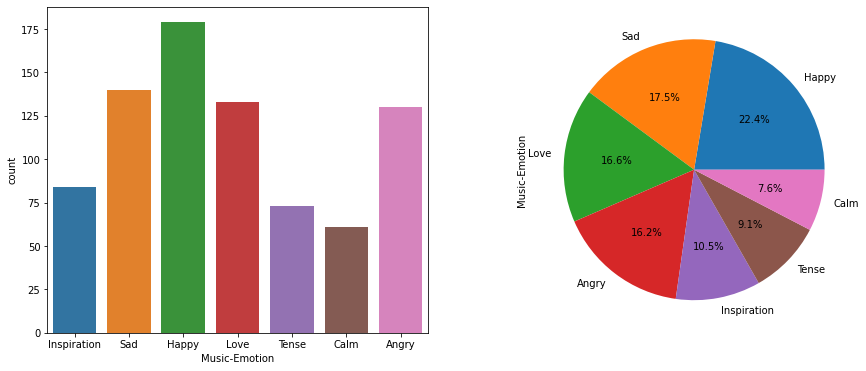

In [13]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='Music-Emotion', data=music_df, ax=ax[0])
_ = music_df['Music-Emotion'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

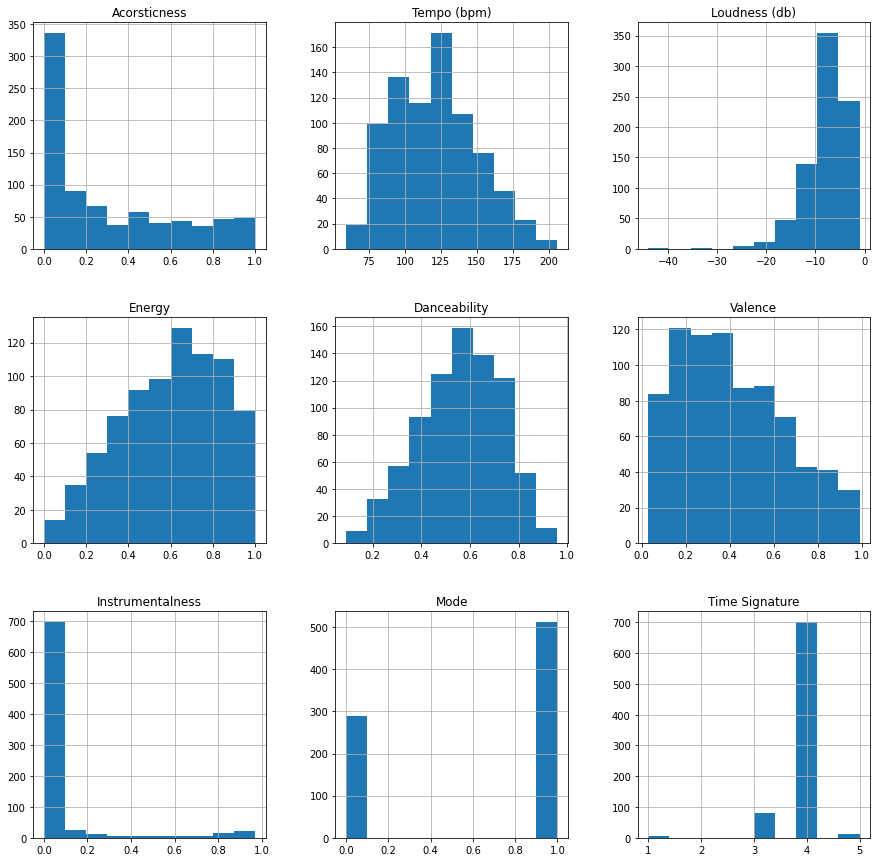

In [14]:
music_df.hist(figsize=(15,15))
plt.show()

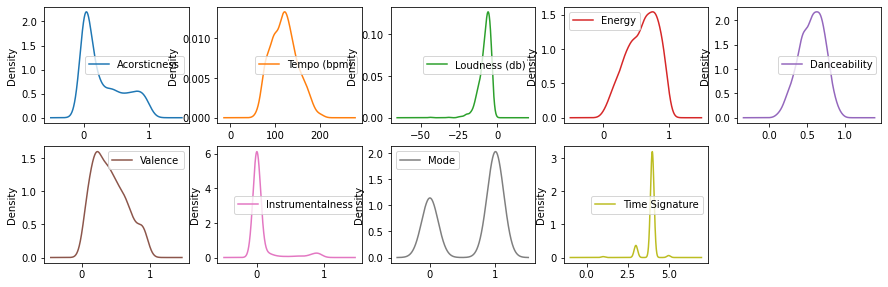

In [15]:
music_df.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

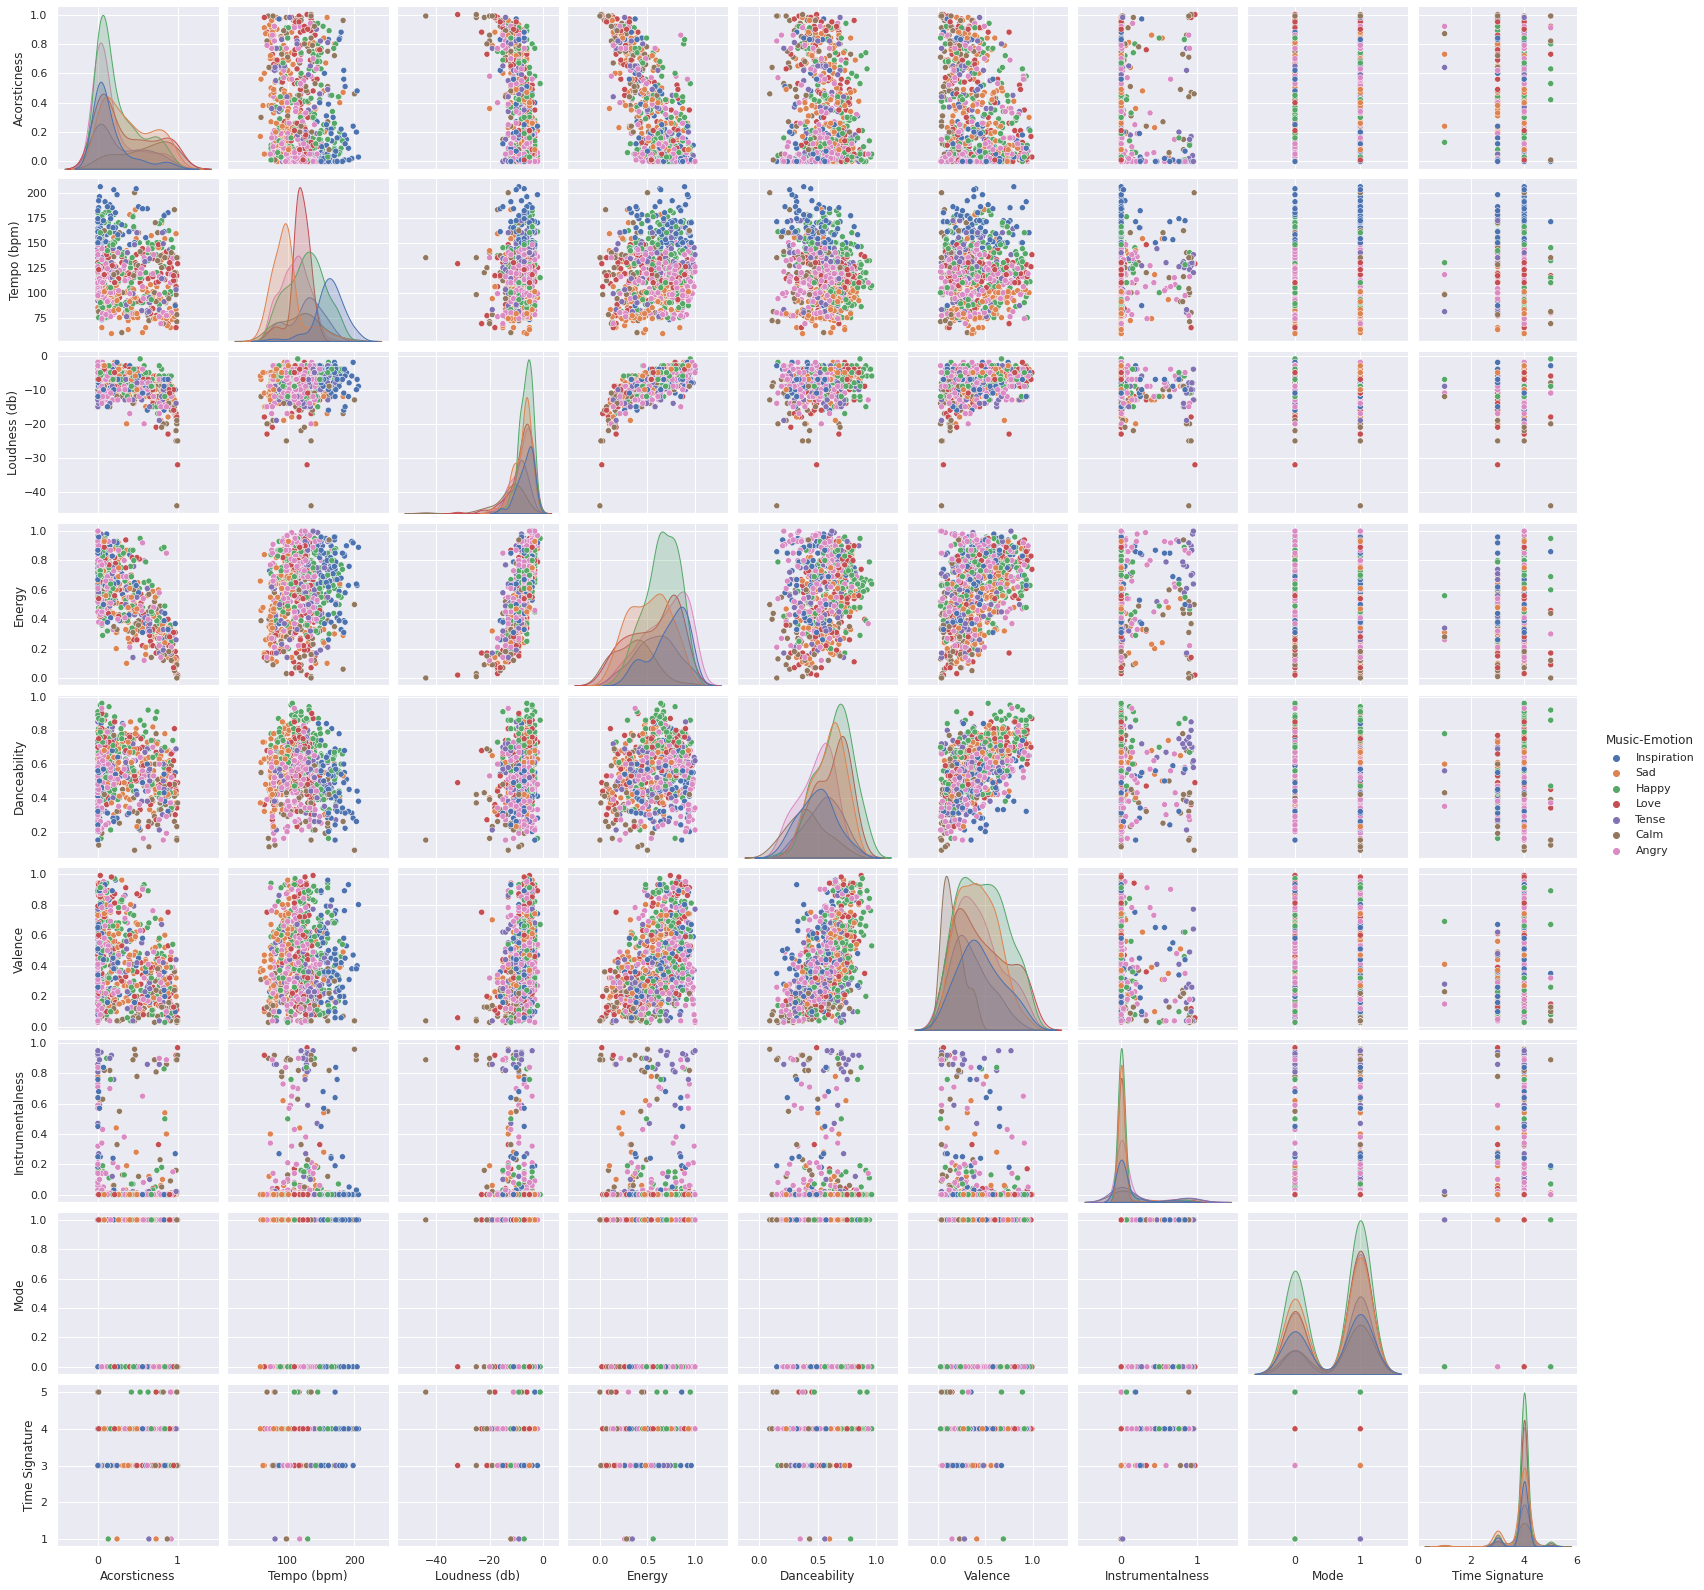

In [16]:
sns.set()
sns.pairplot(music_df[['Genre', 'Acorsticness', 'Tempo (bpm)', 'Loudness (db)', 'Energy', 'Danceability', 'Valence', 'Key-Name', 'Instrumentalness','Mode' , 'Time Signature','Music-Emotion' ]],
            hue="Music-Emotion", diag_kind="kde")

**Data Preprocessing - Musical Data**

In [17]:
df.drop('Instrumentalness',
  axis='columns', inplace=True)
df.drop('Time Signature',
  axis='columns', inplace=True)
df.drop('Mode',
  axis='columns', inplace=True)
df.head()

,Song_ID,Song Title,Genre,Acorsticness,Tempo (bpm),Loudness (db),Energy,Danceability,Valence,Key-Name,Music-Emotion,Chorus,Lyrical-Emotion
0,1,Diana,Pop,0.06,172,-4,0.87,0.55,0.76,D major,Inspiration,"Diana,\rLet me be the one to light a fire insi...",Inspiration
1,2,Don't forget where you belong,Pop,0.10,92,-6,0.71,0.54,0.29,G major,Sad,Don't forget where you belong\rHome\rDon't for...,Inspiration
2,3,Strong,Pop,0.06,115,-7,0.66,0.74,0.34,C major,Inspiration,"I'm sorry if I say, ""I need you""\nBut I don't ...",Inspiration
3,4,Happily,Pop,0.04,117,-5,0.89,0.62,0.82,A major,Inspiration,I don't care what people say when we're togeth...,Love
4,5,Better than words,Pop,0.11,158,-6,0.84,0.63,0.79,B minor,Inspiration,Better than words\rMore than a feeling Crazy i...,Love


In [18]:
possible_genre_lables = df.Genre.unique()

genre_dict = {}
for index, possible_label in enumerate(possible_genre_lables):
    genre_dict[possible_label] = index
genre_dict

{'Ambient': 10,
 'Blues': 11,
 'Classical': 9,
 'Country': 1,
 'Disco': 6,
 'EDM': 3,
 'Hip hop': 4,
 'Jazz': 5,
 'Metal': 7,
 'Pop': 0,
 'Rock': 2,
 'Techno': 8}

In [19]:
df['Genre'] = df.Genre.replace(genre_dict)

In [20]:
possible_labelsKeys = df["Key-Name"].unique()

label_dictKeys = {}
for index, possible_label in enumerate(possible_labelsKeys):
    label_dictKeys[possible_label] = index
label_dictKeys

{'A major': 3,
 'A minor': 14,
 'A# major': 11,
 'A# minor': 24,
 'B major': 23,
 'B minor': 4,
 'C major': 2,
 'C minor': 17,
 'C# Minor': 6,
 'C# major': 5,
 'C# minor': 9,
 'D major': 0,
 'D minor': 18,
 'D# major': 10,
 'D# minor': 22,
 'E major': 12,
 'E minor': 13,
 'F major': 21,
 'F minor': 19,
 'F# major': 8,
 'F# minor': 15,
 'G major': 1,
 'G minor': 20,
 'G# major': 7,
 'G# minor': 16}

In [21]:
df['Key-Name'] = df["Key-Name"].replace(label_dictKeys)

In [22]:
df.head(3)

,Song_ID,Song Title,Genre,Acorsticness,Tempo (bpm),Loudness (db),Energy,Danceability,Valence,Key-Name,Music-Emotion,Chorus,Lyrical-Emotion
0,1,Diana,0,0.06,172,-4,0.87,0.55,0.76,0,Inspiration,"Diana,\rLet me be the one to light a fire insi...",Inspiration
1,2,Don't forget where you belong,0,0.10,92,-6,0.71,0.54,0.29,1,Sad,Don't forget where you belong\rHome\rDon't for...,Inspiration
2,3,Strong,0,0.06,115,-7,0.66,0.74,0.34,2,Inspiration,"I'm sorry if I say, ""I need you""\nBut I don't ...",Inspiration


**Data Preprocessing - Lyrical Data**

In [23]:
lyrical_df = df[['Chorus','Lyrical-Emotion']]
lyrical_df.head(3)

,Chorus,Lyrical-Emotion
0,"Diana,\rLet me be the one to light a fire insi...",Inspiration
1,Don't forget where you belong\rHome\rDon't for...,Inspiration
2,"I'm sorry if I say, ""I need you""\nBut I don't ...",Inspiration


Text Cleaning

In [67]:
stopwords_list = stopwords.words('english')

def LyricsProcessing(df):
  # remove non alphanumeric 
  df['Chorus_cleaned'] = df.Chorus.str.replace('[^a-zA-Z0-9 ]', ' ')
  # lowercase
  df.Chorus_cleaned = df.Chorus_cleaned.str.lower()
  # split into list
  df.Chorus_cleaned = df.Chorus_cleaned.str.split(' ')
  # remove stopwords
  df.Chorus_cleaned = df.Chorus_cleaned.apply(lambda x: [item for item in x if item not in stopwords_list])
  return df

Lemmatization

In [68]:
def get_wordnet_pos(word):
  tag = nltk.pos_tag([word])[0][1][0].upper()
  tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

  return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = nltk.stem.WordNetLemmatizer()
def get_lemmatize(sent):
  return " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sent)])

In [71]:
LyricsProcessing(df)
df.Chorus_cleaned = df.Chorus_cleaned.apply(' '.join)
df['Chorus_lemmatized'] = df.Chorus_cleaned.apply(get_lemmatize)
df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,Song_ID,Song Title,Genre,Acorsticness,Tempo (bpm),Loudness (db),Energy,Danceability,Valence,Key-Name,Music-Emotion,Chorus,Lyrical-Emotion,Chorus_cleaned,Chorus_lemmatized
0,1,Diana,0,0.06,172,-4,0.87,0.55,0.76,0,Inspiration,"Diana,\rLet me be the one to light a fire insi...",Inspiration,diana let one light fire inside eyes lonely ...,diana let one light fire inside eye lonely eve...
1,2,Don't forget where you belong,0,0.10,92,-6,0.71,0.54,0.29,1,Sad,Don't forget where you belong\rHome\rDon't for...,Inspiration,forget belong home forget belong home ever fee...,forget belong home forget belong home ever fee...


**Word Vectorization (Embedding)**

**Data Visualization - Lyrical Data**

# Train Test Split

Stratification - Dealing with inbalanced data set

In [24]:
def get_class_counts(dataframe):
  grp = dataframe.groupby(['Music-Emotion'])['Song_ID'].nunique()
  return {key:grp[key] for key in list(grp.keys())}

def get_class_proportions(dataframe):
  class_counts = get_class_counts(dataframe)
  return {val[0]: round(val[1]/dataframe.shape[0], 4) for val in class_counts.items()}

def get_lyrical_class_counts(dataframe):
  grp = dataframe.groupby(['Lyrical-Emotion'])['Song_ID'].nunique()
  return {key:grp[key] for key in list(grp.keys())}

def get_lyrical_class_proportions(dataframe):
  class_counts = get_lyrical_class_counts(dataframe)
  return {val[0]: round(val[1]/dataframe.shape[0], 4) for val in class_counts.items()}

print("Dataset music class counts", get_class_counts(df))
print("Dataset music class proportions", get_class_proportions(df))
print("Dataset lyrical class counts", get_lyrical_class_counts(df))
print("Dataset lyrical class proportions", get_lyrical_class_proportions(df))

Dataset music class counts {'Angry': 130, 'Calm': 61, 'Happy': 179, 'Inspiration': 84, 'Love': 133, 'Sad': 140, 'Tense': 73}
Dataset music class proportions {'Angry': 0.1625, 'Calm': 0.0762, 'Happy': 0.2238, 'Inspiration': 0.105, 'Love': 0.1662, 'Sad': 0.175, 'Tense': 0.0912}
Dataset lyrical class counts {'Angry': 71, 'Calm': 88, 'Happy': 133, 'Inspiration': 149, 'Love': 146, 'Sad': 213}
Dataset lyrical class proportions {'Angry': 0.0888, 'Calm': 0.11, 'Happy': 0.1662, 'Inspiration': 0.1862, 'Love': 0.1825, 'Sad': 0.2662}


In [75]:
train_set, test_set = train_test_split(df, test_size=0.2)
#train_stratify, test_stratify = train_test_split(df, test_size=0.2, stratify=df['Music-Emotion'])

In [26]:
Songs_train = train_set.iloc[:, 1].values
Songs_test = test_set.iloc[:, 1].values

In [27]:
train_music_set = train_set[['Genre', 'Acorsticness','Tempo (bpm)', 'Loudness (db)', 'Energy', 'Danceability', 'Valence', 'Key-Name', 'Music-Emotion']]

In [28]:
test_music_set = test_set[['Genre', 'Acorsticness','Tempo (bpm)', 'Loudness (db)', 'Energy', 'Danceability', 'Valence', 'Key-Name', 'Music-Emotion']]

In [76]:
train_lyrical_set = train_set[['Chorus_lemmatized', 'Lyrical-Emotion']]

In [77]:
test_lyrical_set = test_set[['Chorus_lemmatized', 'Lyrical-Emotion']]

In [78]:
X_train_music = train_music_set.iloc[:, 0:8].values
y_train_music = train_music_set.iloc[:, -1].values
X_test_music = test_music_set.iloc[:, 0:8].values
y_test_music = test_music_set.iloc[:, -1].values

X_train_lyrics = train_lyrical_set.iloc[:, -2].values
y_train_lyrics = train_lyrical_set.iloc[:, -1].values
X_test_lyrics = test_lyrical_set.iloc[:, -2].values
y_test_lyrics = test_lyrical_set.iloc[:, -1].values

Standaridizer

In [79]:
le = LabelEncoder()
y_train_music = le.fit_transform(y_train_music)
y_test_music = le.fit_transform(y_test_music)

y_train_lyrics = le.fit_transform(y_train_lyrics)
y_test_lyrics = le.fit_transform(y_test_lyrics)

In [81]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder="passthrough")
X_train_music = np.array(X_train_music)
X_test_music = np.array(X_test_music)

In [82]:
cv = CountVectorizer(max_features = 475)
X_train_lyrics = cv.fit_transform(X_train_lyrics).toarray()
X_test_lyrics = cv.fit_transform(X_test_lyrics).toarray()

In [83]:
sc = StandardScaler()
X_train_music = sc.fit_transform(X_train_music)
X_test_music = sc.transform(X_test_music)

# Emotion Classification Using Genre and Music Elements

**Model Training**

In [35]:
# Selected XG-Boost since it has the highest accuracy so far

classifierXGB = XGBClassifier()
classifierXGB.fit(X_train_music, y_train_music)

XGBClassifier(objective='multi:softprob')

**Model Testing**

In [36]:
music_predXGB = classifierXGB.predict(X_test_music)

In [37]:
cm = confusion_matrix(y_test_music, music_predXGB)
print(cm)
accuracy_score(y_test_music, music_predXGB)

[[30  0  0  1  0  0  0]
 [ 0 12  0  0  0  0  0]
 [ 0  0 29  0  4  2  0]
 [ 1  0  1 11  2  0  0]
 [ 0  1  2  0 25  3  0]
 [ 0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0 13]]


0.89375

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      1.00      0.96        12
           2       0.91      0.83      0.87        35
           3       0.92      0.73      0.81        15
           4       0.81      0.81      0.81        31
           5       0.82      1.00      0.90        23
           6       1.00      1.00      1.00        13

    accuracy                           0.89       160
   macro avg       0.91      0.91      0.90       160
weighted avg       0.90      0.89      0.89       160



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


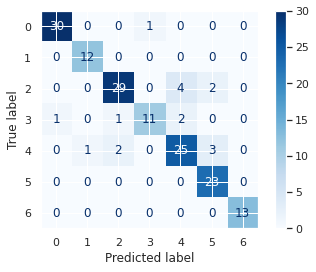

In [38]:
plot_confusion_matrix(classifierXGB,X_test_music,y_test_music,cmap=plt.cm.Blues)
print(classification_report(y_test_music,music_predXGB)) 

**Parameter Optimisation**

In [39]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [40]:
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}
search = RandomizedSearchCV(classifierXGB, param_distributions=params, random_state=42, n_iter=200, cv=10, verbose=1, n_jobs=1, return_train_score=True)
# grid_search = GridSearchCV(estimator = classifierSVM,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 6,
#                            n_jobs = -10)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

search.fit(X_train_music, y_train_music)
report_best_scores(search.cv_results_, 1)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Model with rank: 1
Mean validation score: 0.919 (std: 0.025)
Parameters: {'colsample_bytree': 0.9744593170661344, 'gamma': 0.1850793501277222, 'learning_rate': 0.03463698495866023, 'max_depth': 5, 'n_estimators': 128, 'subsample': 0.7712736593269257}



**Model Validation and Evaluation**

In [41]:
accuracies = cross_val_score(estimator = classifierXGB, X = X_train_music, y = y_train_music, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.94 %
Standard Deviation: 3.19 %


In [42]:
classifierXGB_optimized = XGBClassifier(colsample_bytree = 0.97988, gamma = 0.4954, learning_rate = 0.0915, max_depth = 4, n_estimators = 134, subsample = 0.9705)

accuracies = cross_val_score(estimator = classifierXGB_optimized, X = X_train_music, y = y_train_music, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 91.41 %
Standard Deviation: 2.99 %


# Emotion Classification Using Lyrical Data

**Model Training**

In [91]:
classifier__XGB= Pipeline([
                ('tfidf', TfidfTransformer()),
                ('xgb', XGBClassifier(colsample_bytree = 0.97988, gamma = 0.4954, learning_rate = 0.0915, max_depth = 4, n_estimators = 134, subsample = 0.9705))])

classifier__XGB.fit(X_train_lyrics,y_train_lyrics)

Pipeline(steps=[('tfidf', TfidfTransformer()),
                ('xgb',
                 XGBClassifier(colsample_bytree=0.97988, gamma=0.4954,
                               learning_rate=0.0915, max_depth=4,
                               n_estimators=134, objective='multi:softprob',
                               subsample=0.9705))])

**Model Testing**

In [94]:
lyrics_predXGB = classifier__XGB.predict(X_test_lyrics)

In [93]:
cm = confusion_matrix(y_test_lyrics, lyrics_predXGB)
print(cm)
accuracy_score(y_test_lyrics, lyrics_predXGB)

[[ 0  4  5  3  2  6]
 [ 0  5  2  0  0  4]
 [ 1  6  4  3  2  6]
 [ 5 13  8  7  4 10]
 [ 1  9  8  5  1  6]
 [ 5  2  7  1  1 14]]


0.19375

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.13      0.45      0.20        11
           2       0.12      0.18      0.14        22
           3       0.37      0.15      0.21        47
           4       0.10      0.03      0.05        30
           5       0.30      0.47      0.37        30

    accuracy                           0.19       160
   macro avg       0.17      0.21      0.16       160
weighted avg       0.21      0.19      0.17       160



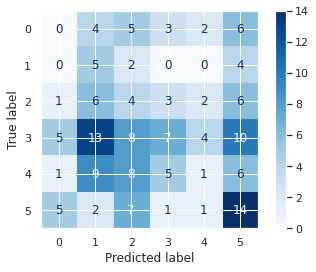

In [95]:
plot_confusion_matrix(classifier__XGB,X_test_lyrics,y_test_lyrics,cmap=plt.cm.Blues)
print(classification_report(y_test_lyrics,lyrics_predXGB)) 

**Parameter Optimization**

**Model Validation and Evaluation**

In [96]:
accuracies_lyrics = cross_val_score(estimator = classifier__XGB, X = X_train_lyrics, y = y_train_lyrics, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_lyrics.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_lyrics.std()*100))

Accuracy: 47.97 %
Standard Deviation: 3.89 %


# Human Emotion - Song Emotion Matrix

Import map

In [135]:
human_emo_song_emo_map = pd.read_csv('Human_Emo-Song_Emo_Map.csv',encoding='cp1252',index_col=0)
human_emo_song_emo_map

,Happy,Sad,Calm,Love,Angry,Inspiration,Tension
Happy,2,0,0,1,0,1,0
Sad,1,2,1,1,-1,0,-1
Depressed,0,2,2,1,-2,1,-2
Calm,2,0,1,2,-1,2,-1
Angry,0,0,2,0,-2,1,-2
Eustress,2,0,1,0,0,2,1
Distress,0,0,2,0,-1,2,-2
Fear,1,-1,2,0,-1,2,-2
Nervousness,2,0,1,0,0,2,-2
Love - Romance,2,0,0,2,0,0,-1


In [136]:
human_emo_song_emo_matrix = human_emo_song_emo_map.iloc[:, 0:7]
human_emo_song_emo_matrix

,Happy,Sad,Calm,Love,Angry,Inspiration,Tension
Happy,2,0,0,1,0,1,0
Sad,1,2,1,1,-1,0,-1
Depressed,0,2,2,1,-2,1,-2
Calm,2,0,1,2,-1,2,-1
Angry,0,0,2,0,-2,1,-2
Eustress,2,0,1,0,0,2,1
Distress,0,0,2,0,-1,2,-2
Fear,1,-1,2,0,-1,2,-2
Nervousness,2,0,1,0,0,2,-2
Love - Romance,2,0,0,2,0,0,-1


Visualization

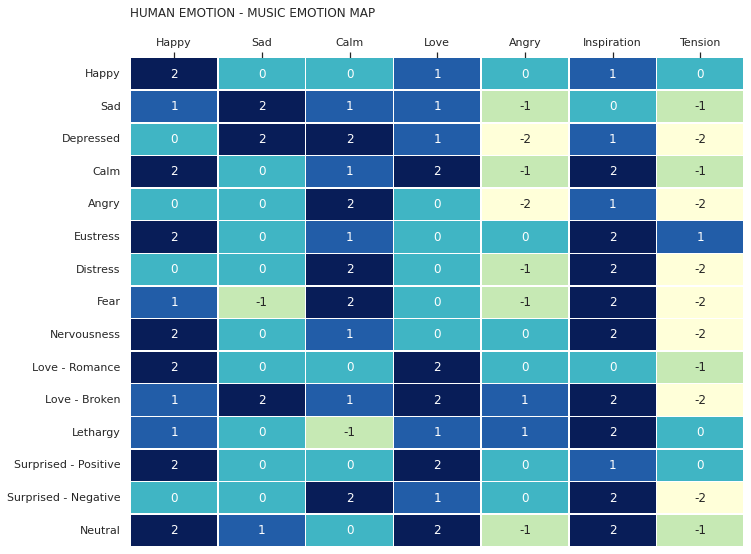

In [45]:
f, ax = plt.subplots(figsize=(11, 9))
ax.xaxis.tick_top()
ax = sns.heatmap(human_emo_song_emo_matrix, vmin=-2, vmax=2, center=0, annot=True, fmt="d",linewidths=.5, cmap="YlGnBu", cbar=False)

title = 'Human Emotion - Music Emotion Map\n'.upper()
plt.title(title, loc='left')
plt.show()

# # figure
# fig, ax = plt.subplots(figsize=(11, 9))
# # plot heatmap
# sns.heatmap(human_emo_song_emo_matrix, cmap="Blues", vmin= -2, vmax=2, center=0, annot=True, fmt="d",
#            linewidth=0.5)
# # xticks
# ax.xaxis.tick_top()
# # xticks_labels = ['Happy', 'Sad','Calm', 'Love', 'Angry', 'Inspiration', 'Tention']
# # plt.xticks(np.arange(12) + .5, labels=xticks_labels)
# # axis labels
# # plt.xlabel('')
# # plt.ylabel('')
# # title
# title = 'Human Emotion - Music Emotion Map\n'.upper()
# plt.title(title, loc='left')
# plt.show()

# Song - Song Emotion Matrix

**Convert music-emotion to matrix**

In [46]:
music_predXGB = le.inverse_transform(music_predXGB)

In [47]:
musicPredValues = pd.get_dummies(music_predXGB)

idx = 0
musicPredValues.insert(loc=idx, column='Song', value=Songs_test)

musicPredValues=musicPredValues.set_index('Song')
musicPredValues

,Angry,Calm,Happy,Inspiration,Love,Sad,Tense
Song,,,,,,,
Sweet Little Angel,0,0,0,0,0,1,0
Bleeding love,0,0,0,0,0,1,0
One last song,0,0,1,0,0,0,0
Build My Life,0,0,0,0,0,0,1
(Donâ€™t Fear) The Reaper,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
Bad day,0,0,0,0,0,1,0
Good Grace,1,0,0,0,0,0,0
Love Myself,0,0,0,0,1,0,0


Visualization

In [48]:
song_music_emo_matrix = musicPredValues.iloc[:, 0:7]

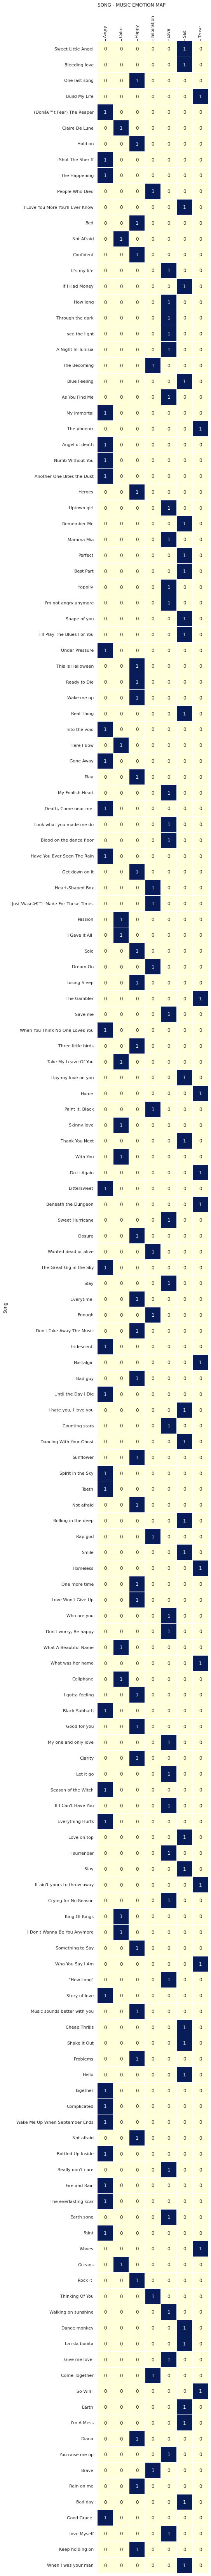

In [49]:
f, ax = plt.subplots(figsize=(25,120))
ax.xaxis.tick_top()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(song_music_emo_matrix, vmin=0, vmax=1, square=True, annot=True, fmt="d",linewidths=.5, cmap="YlGnBu", cbar=False)

title = 'Song - Music Emotion Map\n'.upper()
plt.title(title, loc='left')
plt.show()

In [50]:
song_emo_matrix = song_music_emo_matrix.values
song_emo_matrix

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [51]:
music_weight = 2

music_emotion_matrix = np.multiply(music_weight,song_emo_matrix)
music_emotion_matrix 

array([[0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0]], dtype=uint8)

**Convert lyrical-emotion to matrix**

In [97]:
lyrics_predXGB = le.inverse_transform(lyrics_predXGB)

In [103]:
lyricsPredValues = pd.get_dummies(lyrics_predXGB)

idx = 0
lyricsPredValues.insert(loc=idx, column='Song', value=Songs_test)

lyricsPredValues=lyricsPredValues.set_index('Song')
lyricsPredValues['Tense'] = 0
lyricsPredValues

,Angry,Calm,Happy,Inspiration,Love,Sad,Tense
Song,,,,,,,
Sweet Little Angel,0,0,0,0,0,1,0
Bleeding love,0,0,0,0,0,1,0
One last song,0,0,0,0,0,1,0
Build My Life,0,1,0,0,0,0,0
(Donâ€™t Fear) The Reaper,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
Bad day,0,0,0,0,0,1,0
Good Grace,0,1,0,0,0,0,0
Love Myself,0,0,0,0,0,1,0


Visualization

In [104]:
song_lyrical_emo_matrix = lyricsPredValues.iloc[:, 0:6]

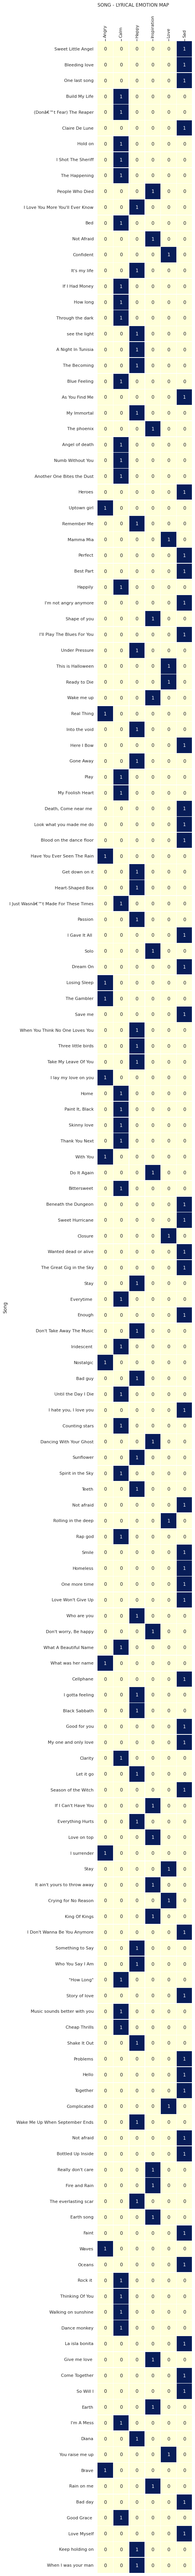

In [105]:
f, ax = plt.subplots(figsize=(25,120))
ax.xaxis.tick_top()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(song_lyrical_emo_matrix, vmin=0, vmax=1, square=True, annot=True, fmt="d",linewidths=.5, cmap="YlGnBu", cbar=False)

title = 'Song - Lyrical Emotion Map\n'.upper()
plt.title(title, loc='left')
plt.show()

In [106]:
song_lyrical_emo_matrix = lyricsPredValues.iloc[:, 0:7]
lyrical_emo_matrix = song_lyrical_emo_matrix.values
lyrical_emo_matrix

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [113]:
lyrical_weights = [2,1,1,2,1,2,1]

lyrical_emotion_matrix_w = np.multiply(lyrical_weights,lyrical_emo_matrix)

print(lyrical_weights)
print(lyrical_emo_matrix[0])
print(lyrical_emotion_matrix_w[0])

[2, 1, 1, 2, 1, 2, 1]
[0 0 0 0 0 1 0]
[0 0 0 0 0 2 0]


**Combined Matrix**

In [114]:
overall_emotion_matrix = np.add(music_emotion_matrix, lyrical_emotion_matrix_w)
overall_emotion_matrix

array([[0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 2, ..., 0, 2, 0],
       ...,
       [0, 0, 0, ..., 2, 2, 0],
       [0, 0, 3, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 2, 0]])

In [120]:
overall_emotion_df = pd.DataFrame(overall_emotion_matrix)
overall_emotion_df = overall_emotion_df.rename(columns = {0: 'Angry', 1 : 'Calm', 2: 'Happy' , 3 : 'Inspiration', 4: 'Love', 5: 'Sad', 6 : 'Tense'}, inplace = False)

idx = 0
overall_emotion_df.insert(loc=idx, column='Song', value=Songs_test)

overall_emotion_df=overall_emotion_df.set_index('Song')
overall_emotion_df

,Angry,Calm,Happy,Inspiration,Love,Sad,Tense
Song,,,,,,,
Sweet Little Angel,0,0,0,0,0,4,0
Bleeding love,0,0,0,0,0,4,0
One last song,0,0,2,0,0,2,0
Build My Life,0,1,0,0,0,0,2
(Donâ€™t Fear) The Reaper,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...
Bad day,0,0,0,0,0,4,0
Good Grace,2,1,0,0,0,0,0
Love Myself,0,0,0,0,2,2,0


Visualization

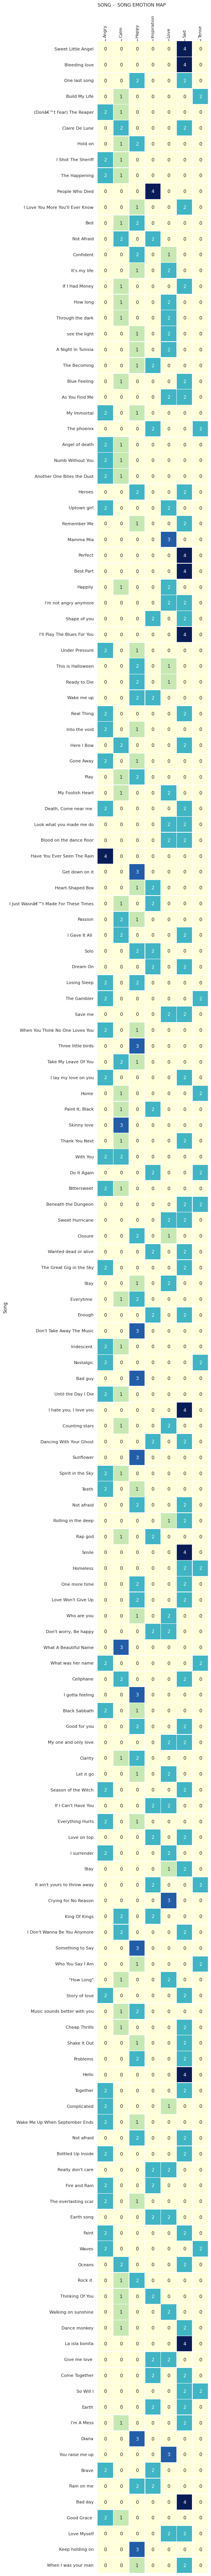

In [124]:
f, ax = plt.subplots(figsize=(25,120))
ax.xaxis.tick_top()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(overall_emotion_df, vmin=0, vmax=4, square=True, annot=True, fmt="d",linewidths=.5, cmap="YlGnBu", cbar=False)

title = 'Song -  Song Emotion Map\n'.upper()
plt.title(title, loc='left')
plt.show()

# Human emotion - Songs Suitability Score Matrix

In [140]:
#Transpose of matrix
overall_emotion_matrix.T

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 3, 1],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [4, 4, 2, ..., 2, 0, 2],
       [0, 0, 0, ..., 0, 0, 0]])

In [138]:
human_emo_song_emo_matrix = human_emo_song_emo_matrix.reindex(columns=['Angry', 'Calm','Happy','Inspiration', 'Love', 'Sad', 'Tension'])
emo_matrix = human_emo_song_emo_matrix.to_numpy()
emo_matrix

array([[ 0,  0,  2,  1,  1,  0,  0],
       [-1,  1,  1,  0,  1,  2, -1],
       [-2,  2,  0,  1,  1,  2, -2],
       [-1,  1,  2,  2,  2,  0, -1],
       [-2,  2,  0,  1,  0,  0, -2],
       [ 0,  1,  2,  2,  0,  0,  1],
       [-1,  2,  0,  2,  0,  0, -2],
       [-1,  2,  1,  2,  0, -1, -2],
       [ 0,  1,  2,  2,  0,  0, -2],
       [ 0,  0,  2,  0,  2,  0, -1],
       [ 1,  1,  1,  2,  2,  2, -2],
       [ 1, -1,  1,  2,  1,  0,  0],
       [ 0,  0,  2,  1,  2,  0,  0],
       [ 0,  2,  0,  2,  1,  0, -2],
       [-1,  0,  2,  2,  2,  1, -1]])

In [145]:
human_emo_song_suitability_score_matrix = np.dot(emo_matrix,overall_emotion_matrix.T)
print(human_emo_song_suitability_score_matrix[0])

[0 0 4 0 0 0 4 0 0 4 2 4 2 5 4 0 2 2 4 4 4 0 2 2 2 0 0 0 4 2 2 3 0 0 2 2 2
 0 2 5 5 6 0 2 0 2 4 2 0 2 2 0 6 4 2 2 0 6 2 4 0 2 2 6 2 0 0 2 0 0 0 2 0 0
 2 5 2 0 4 4 2 6 0 0 6 0 0 2 2 6 0 2 4 1 2 0 0 4 4 4 4 0 0 0 6 2 4 2 4 4 0
 4 2 2 2 1 2 3 2 0 6 2 2 0 4 0 2 4 0 0 1 2 4 0 4 2 2 4 0 0 0 4 2 2 0 0 4 2
 0 2 0 6 3 2 6 0 0 2 6 2]


In [150]:
# human_emo_song_suitability_score_df = pd.DataFrame(human_emo_song_suitability_score_matrix)

# idx = 0
# human_emo_song_suitability_score_df.insert(loc=idx, column='User Emotion', value=['Happy', 'Sad', 'Depressed', 'Calm', 'Angry', 'Eustress', 'Distress', 'Fear', 'Nervousness', 'Love - Romance', 'Love - Broken', 'Lethargy', 'Surprised - Positive', 'Surprised - Negative', 'Neutral'])

# human_emo_song_suitability_score_df=human_emo_song_suitability_score_df.set_index('User Emotion')

song_human_emo_suitability_score_df = pd.DataFrame(human_emo_song_suitability_score_matrix.T)
song_human_emo_suitability_score_df = song_human_emo_suitability_score_df.rename(columns = {0 :'Happy', 1: 'Sad', 2: 'Depressed', 3: 'Calm', 4: 'Angry', 5: 'Eustress', 6: 'Distress', 7: 'Fear', 8: 'Nervousness', 9: 'Love - Romance', 10 :'Love - Broken', 11 :'Lethargy', 12 : 'Surprised - Positive', 13 :'Surprised - Negative', 14 :'Neutral'}, inplace = False)

idx = 0
song_human_emo_suitability_score_df.insert(loc=idx, column='Song', value=Songs_test)

song_human_emo_suitability_score_df=song_human_emo_suitability_score_df.set_index('Song')
song_human_emo_suitability_score_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happy,160.0,2.06250,1.898982,0.0,0.00,2.0,4.0,6.0
Sad,160.0,2.61875,2.904934,-4.0,0.75,3.0,5.0,8.0
Depressed,160.0,2.10000,3.968746,-8.0,0.00,2.0,6.0,8.0
Calm,160.0,2.60625,3.108311,-4.0,0.00,3.0,5.0,8.0
Angry,160.0,-0.20000,2.883045,-8.0,-2.00,0.0,2.0,6.0
Eustress,160.0,2.56875,2.162057,0.0,1.00,2.0,4.0,8.0
Distress,160.0,0.72500,2.696259,-6.0,0.00,0.0,2.0,8.0
Fear,160.0,0.41250,3.206494,-6.0,-2.00,0.0,2.0,8.0
Nervousness,160.0,2.08125,2.594071,-4.0,0.00,2.0,4.0,8.0
Love - Romance,160.0,1.96250,2.462007,-2.0,0.00,2.0,4.0,6.0


In [151]:
song_human_emo_suitability_score_df.head(3)

,Happy,Sad,Depressed,Calm,Angry,Eustress,Distress,Fear,Nervousness,Love - Romance,Love - Broken,Lethargy,Surprised - Positive,Surprised - Negative,Neutral
Song,,,,,,,,,,,,,,,
Sweet Little Angel,0,8,8,0,0,0,0,-4,0,0,8,0,0,0,4
Bleeding love,0,8,8,0,0,0,0,-4,0,0,8,0,0,0,4
One last song,4,6,4,4,0,4,0,0,4,4,6,2,4,0,6


Visualization

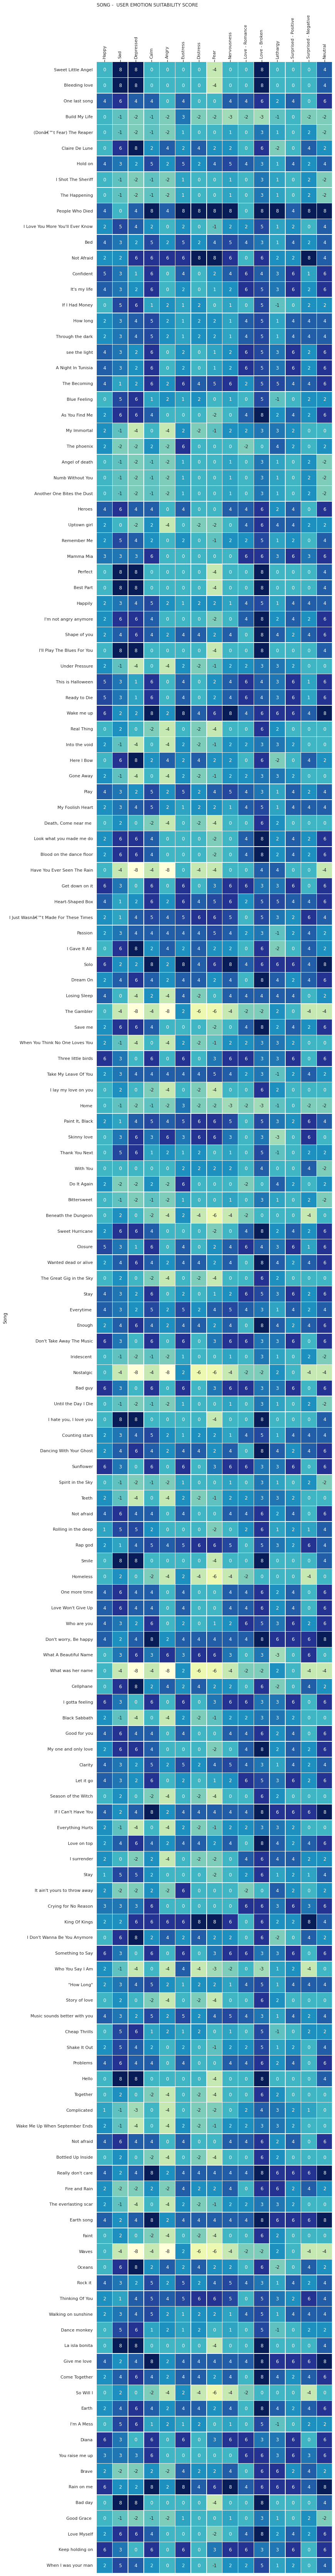

In [152]:
f, ax = plt.subplots(figsize=(25,120))
ax.xaxis.tick_top()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(song_human_emo_suitability_score_df, vmin=-8, vmax=8, square=True, annot=True, fmt="d",linewidths=.5, cmap="YlGnBu", cbar=False)

title = 'Song -  User Emotion Suitability Score\n'.upper()
plt.title(title, loc='left')
plt.show()

# Make Predictions

Default user emotion and song's attributes

In [52]:
user_emo = 'Happy'
#Thre is a oder - Genre, Music elements, Lyrics
music_attributes = []

Predict music emotion

In [53]:
def get_music_emotion(music_attributes):
    # Emotion classification based on the music elements 
    predicted_emo = 'Happy'
    return predicted_emo

Predict lyrical emotion

In [54]:
def get_lyrical_emotion(music_attributes):
    #Lyrics classification based on the lyrics
    predicted_emo = 'Calm'
    return predicted_emo

Convert to emotion vector

In [55]:
def convert_emo_vector(emotion):
    #Has 7 music emotions and convert to emo vector by putting 1 to recived emo type
    
    predifend_set = [0,0,0,0,0,0,0]
    emo_vector = [1,0,0,0,0,0,0]
    return emo_vector

Get emotion vector

In [56]:
def get_emotion_vector(music_emotion, lyrical_emotion):
    #Convert to a vector of selected 7 music emotion types
    
    music_weight = 2
    lyrical_weight = 1

    if(music_emotion == 'Happy' | music_emotion == 'Calm'):
        if(lyrical_emotion == 'Happy' | lyrical_emotion == 'Calm'):
            music_weight = 2
            lyrical_weight = 1
        else:
            music_weight =2
            lyrical_weight=2
    else:
        if(lyrical_emotion == 'Happy' | lyrical_emotion == 'Calm'):
            music_weight = 1
            lyrical_weight = 1
        else:
            music_weight =1
            lyrical_weight=2
        return music_weight, lyrical_weight

    music_emo_vector = music_weight * get_emotion_vector(music_emotion)
    lyrical_emo_vector = lyrical_weight * get_emotion_vector(lyrical_emotion)
    emo_vector = music_emo_vector + lyrical_emo_vector
    emo_vector = [[1,0,2,0,0,0,0]]
    return emo_vector

Get suitability score

In [57]:
def get_suitability_score(emo_vector):
    #Predefined human-emotion(18), music-emotion(7) matrix [18,7]
    human_music_emo_matrix = [
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0],
        [1,-1,-1,0,1,0,0]
    ]

    #This traspose is [7,1]
    emo_vector_transpose = [[1],
                        [0],
                        [2],
                        [0],
                        [0],
                        [0],
                        [0]]

    #This should be a [18,1]
    suitability_score = [[1],
                     [-2],
                     [1],
                     [0],
                     [1],
                     [-2],
                     [1],
                     [0],
                     [1],
                     [-2],
                     [1],
                     [0],
                     [1],
                     [-2],
                     [1],
                     [0],
                     [1],
                     [-2]
                     ]
    return suitability_score

Convert output to a readable format

In [58]:
def convert_output_to_readable_format(user_emo, suitability_score_vector):
    if(user_emo == ''):
        #Return all the scores for 18 emo types as a data frame and readble format
        suitability = {'Happy' : 1, 'Sad' : -1, 'Calm' : 0}
        return suitability
    else:
        return suitability.user_emo

Get suitability score of a song

In [59]:
#Final Function
def get_suitability_score_of_song(user_emo, music_attributes):
    
    music_emotion = get_music_emotion(music_attributes.iloc[:,0:8].values)
    lyrical_emotion = get_lyrical_emotion(music_attributes.iloc[:, -1].values)
    
    emo_vector = get_emotion_vector(music_emotion, lyrical_emotion)
    
    suitability_score_vector = get_suitability_score(emo_vector)
    
    readable_output = convert_output_to_readable_format(user_emo, suitability_score_vector)
    
    return readable_output

In [60]:
output = get_suitability_score_of_song('', [])

AttributeError: ignored